In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim


PUNTO 2

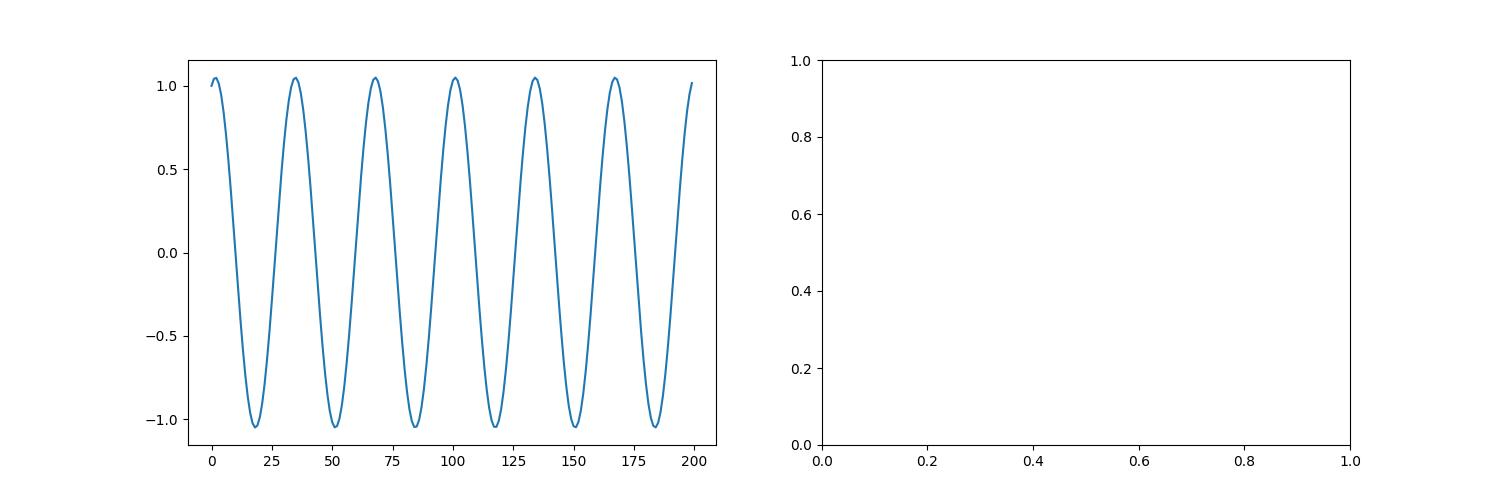

In [2]:
t=np.linspace(0,12,200)
x0=1
vx0=1
w=np.pi
h=t[1]-t[0]
#EULER
X1= x0+ h*vx0 + h**2 * (-w**2*x0)/2 
#VERLET
X=np.zeros_like(t)
X[0]=x0
X[1]=X1  
for i in range(2,len(t)):
    X[i]=2*X[i-1]-X[i-2]+h**2 * -w**2 * X[i-1]
    

#-------------------------------------------------------------------------    
    
    
scale = 2
t1 = t[::scale]


fig= plt.figure(figsize=(15,5))

ax=fig.add_subplot(121)
ax.plot(X)

ax1=fig.add_subplot(122)


#-------------------------------------------------------------------------    

def init():
    
    ax.clear()
    
    
    ax1.clear()
    ax1.set_xlim(-1.5,1.5)
    ax1.set_ylim(-1,1) 
lis=[]
tlis=[]

def Update(i):
    
    init()
    global lis
    global tlis
    x=X[i]
    y=-0.25
    cuadrado=plt.Rectangle((x,y),0.4,0.4)
    ax1.add_patch(cuadrado)
    lis.append(x)
    tlis.append(t1[i])
    ax.scatter(tlis,lis,color="r")

Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)


PUNTO 6

In [78]:
a= 0.387098
e = 0.205630
G= 4*np.pi**2
MS=1


alpha=1.1e-8
r0=np.array([a*(1+e),0])
v0=np.array([0,np.sqrt(G*((1-e)/(a*(1+e))))])
h_=np.linspace(0,3,50000000)
dt_=1e-7
print(dt_,len(h_))


1e-07 50000000


In [79]:

r=np.zeros((len(h_),2))
v=np.zeros((len(h_),2))
A=np.zeros((len(h_),2))
    
norma1=np.linalg.norm(r0)
direc1=r0/norma1  

r[0]=r0
v[0]=v0
A[0]= - ((G*MS)/(norma1**2))*(1+ alpha/(norma1**2))*direc1
for i in range(1,len(h_)):
    norma=np.linalg.norm(r[i-1])
    direc=r[i-1]/norma
    Fuerza= - ((G*MS)/(norma**2))*(1+(alpha/(norma**2)))*direc
    A[i]=Fuerza
    v[i]=v[i-1]+dt_*0.5*(A[i] +A[i-1])
    r[i]=r[i-1]+ v[i-1]*dt_ + 0.5*A[i-1] *dt_**2
    
    
        
    

In [80]:

af=np.zeros((0,2))
for i in range(1,len(r)-1):
    normap=np.linalg.norm(r[i])
    
    if normap < np.linalg.norm(r[i-1]) and  normap < np.linalg.norm(r[i+1]):
        af=np.append(af,np.array([r[i]]),axis=0)
  
    

In [81]:
grados=[]
for i in range(1,len(af)):
    cos_1=np.arccos(np.dot(r[0],af[i])/(np.linalg.norm(r[0])*np.linalg.norm(af[i])))
    
    second_century=cos_1*100*3600
    grados.append(cos_1)


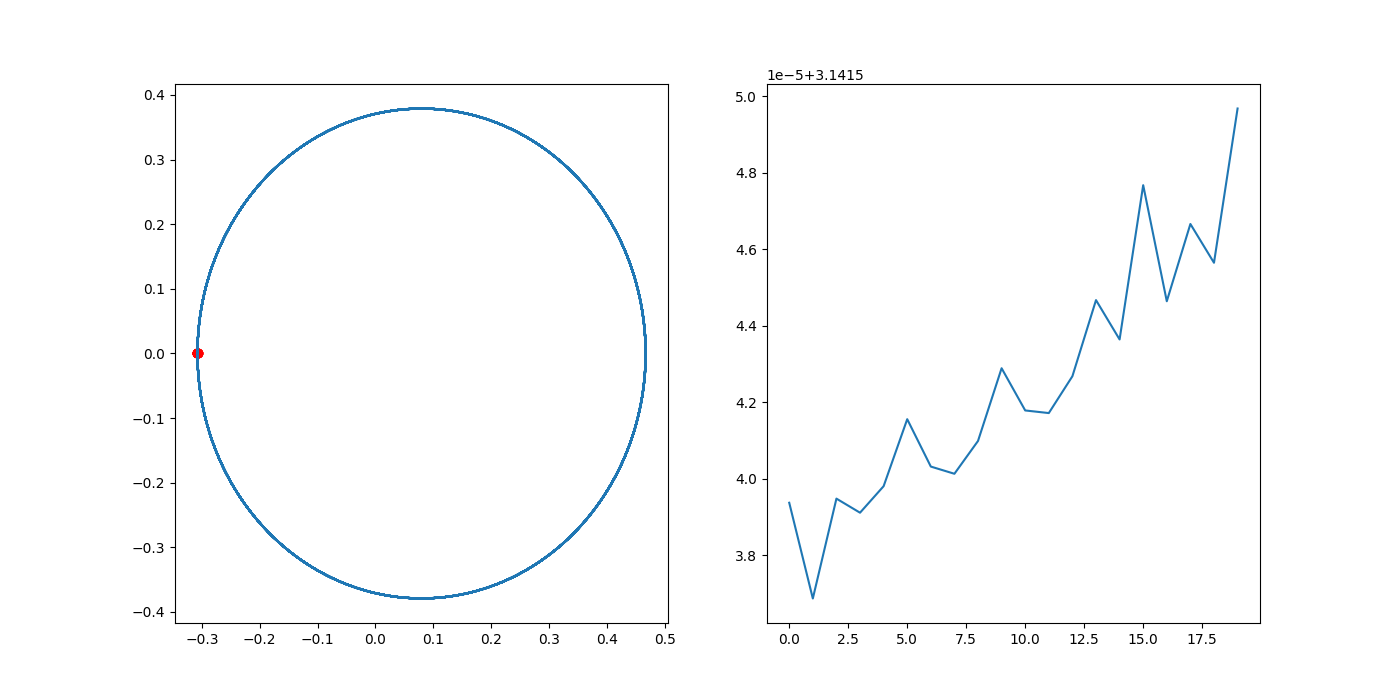

In [85]:
r2=r[::200]
figura=plt.figure(figsize=(14,7))
ax333=figura.add_subplot(121)
ax334=figura.add_subplot(122)
ax333.plot(r2[:,0],r2[:,1])
ax333.scatter(af[:,0],af[:,1],color="r")
ax334.plot(grados)
